# ITS307 Data Analytics : Autumn Semester 2022
# ClassWork 

# Supervised Learning 


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
train_df = pd.read_csv('train-data.csv')
train_df

Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       CNG       Manual      First  26.6 km/kg   
1                 41000    Diesel       Manual      First  19.67 kmpl   
2                 46000    Petrol       Manual      First   18.2 kmpl   
3                 87000    Diesel       Manual      First  20.77 kmpl   
4                 40670    Diesel    Automatic     Second   15.2 kmpl   
...                 ...       ...          ...        ...         ...   
6014              27365    Diesel       Manual      First   28.4 kmpl   
6015             100000    Diesel       Manual      First   24.4 kmpl   
6016              55000    Diesel       Manual     Second   14.0 kmpl   
6017              46000    Petrol       Manual      First   18.9 kmpl   
6018              47000    Diesel       Manual      First  25.44 kmpl   

       Engine      Power  Seats  New_Price  Price  
0      998 CC  58.16 bhp    5.0        NaN   1.75  
1     1582 CC  126.2 bhp    5.0        NaN  12.50  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50  
3     1248 CC  88.76 bhp    7.0        NaN   6.00  
4     1968 CC  140.8 bhp    5.0        NaN  17.74  
...       ...        ...    ...        ...    ...  
6014  1248 CC     74 bhp    5.0  7.88 Lakh   4.75  
6015  1120 CC     71 bhp    5.0        NaN   4.00  
6016  2498 CC    112 bhp    8.0        NaN   2.90  
6017   998 CC   67.1 bhp    5.0        NaN   2.65  
6018   936 CC   57.6 bhp    5.0        NaN   2.50  

[6019 rows x 14 columns]

In [14]:
test_df = pd.read_csv('test-data.csv')
test_df.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

# 2. Loading and Cleaning with Pandas

In [80]:
train_df.isna().sum()


Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [20]:
train_df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [77]:
from sklearn.impute import SimpleImputer

categorical_cols = train_df.select_dtypes(include = ['object'])

impute = SimpleImputer(strategy = 'most_frequent')
data = impute.fit_transform(categorical_cols)
cdf = pd.DataFrame(data, columns = categorical_cols.columns)
cdf.isna().sum()

Name            0
Location        0
Fuel_Type       0
Transmission    0
Owner_Type      0
Mileage         0
Engine          0
Power           0
New_Price       0
dtype: int64

In [83]:
numerical_cols = train_df.select_dtypes(include = ['int64', "float64"])

impute = SimpleImputer(strategy = 'mean')
ndata = impute.fit_transform(numerical_cols)
ndf = pd.DataFrame(ndata, columns = numerical_cols.columns)
ndf.isna().sum()

Unnamed: 0           0
Year                 0
Kilometers_Driven    0
Seats                0
Price                0
dtype: int64

# 3.  EDA and Visualization

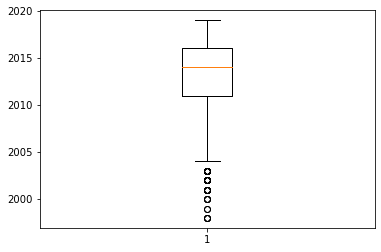

In [88]:
#outlier detection

x = ndf['Year']
plt.boxplot(x)
plt.show()


before removing : (6019, 5)
After removing: (5969, 5)


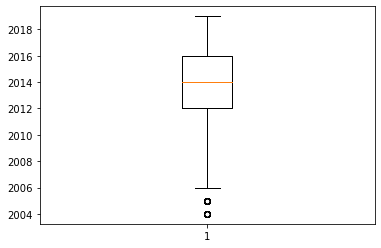

Unnamed: 0    Year  Kilometers_Driven  Seats  Price
0            0.0  2010.0            72000.0    5.0   1.75
1            1.0  2015.0            41000.0    5.0  12.50
2            2.0  2011.0            46000.0    5.0   4.50
3            3.0  2012.0            87000.0    7.0   6.00
4            4.0  2013.0            40670.0    5.0  17.74
...          ...     ...                ...    ...    ...
6013      6013.0  2015.0            70602.0    5.0   4.83
6014      6014.0  2014.0            27365.0    5.0   4.75
6015      6015.0  2015.0           100000.0    5.0   4.00
6017      6017.0  2013.0            46000.0    5.0   2.65
6018      6018.0  2011.0            47000.0    5.0   2.50

[5860 rows x 5 columns]

In [132]:
Q1 = ndf.Year.quantile(0.25)
Q3 = ndf.Year.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print("before removing :", ndf.shape)
ndf1 = ndf[(ndf.Year > lowerlimit) & (ndf.Year < upperlimit)]
print("After removing:", ndf1.shape)
x = ndf1["Year"]
plt.boxplot(x)
plt.show()

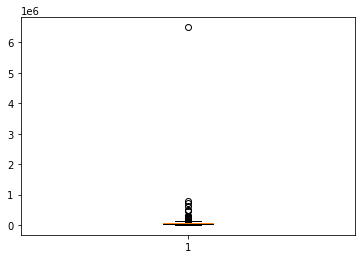

In [89]:
x = ndf['Kilometers_Driven']
plt.boxplot(x)
plt.show()

before removing : (6019, 5)
After removing: (5969, 5)


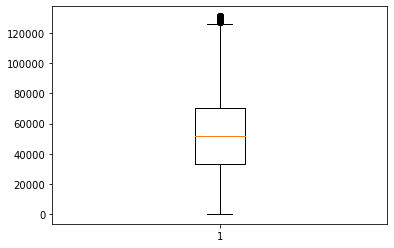

In [122]:
Q1 = ndf.Kilometers_Driven.quantile(0.25)
Q3 = ndf.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print("before removing :", ndf.shape)
ndf2 = ndf[(ndf.Kilometers_Driven > lowerlimit) & (ndf.Kilometers_Driven < upperlimit)]
print("After removing:", ndf1.shape)
x = ndf2["Kilometers_Driven"]
plt.boxplot(x)
plt.show()

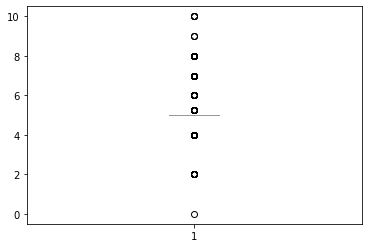

In [90]:
x = ndf['Seats']
plt.boxplot(x)
plt.show()

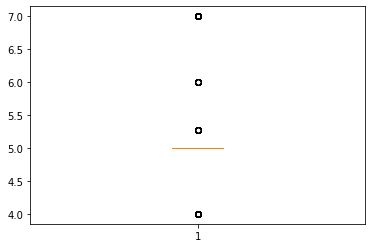

In [124]:
std = ndf.Seats.std()
mean = ndf.Seats.mean()
upperlimit = mean + (3 * std)
lowerlimit = mean - (3 * std)
ndf3 = ndf[(ndf.Seats>lowerlimit) & (ndf.Seats<upperlimit)]
ndf3.shape

x = ndf3["Seats"]
plt.boxplot(x)
plt.show()

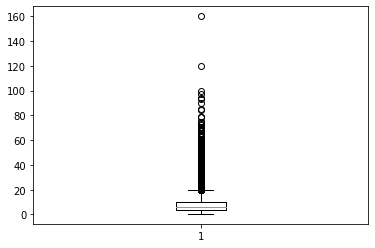

In [91]:
x = ndf['Price']
plt.boxplot(x)
plt.show()

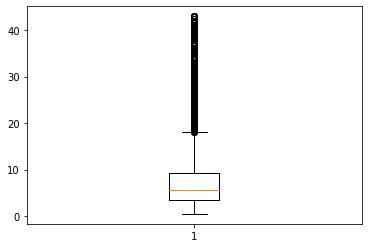

In [135]:
std = ndf.Price.std()
mean = ndf.Price.mean()
upperlimit = mean + (3 * std)
lowerlimit = mean - (3 * std)
ndf4 = ndf[(ndf.Price>lowerlimit) & (ndf.Price<upperlimit)]
ndf4.shape

x = ndf4["Price"]
plt.boxplot(x)
plt.show()

# 4. Feature Engineering 

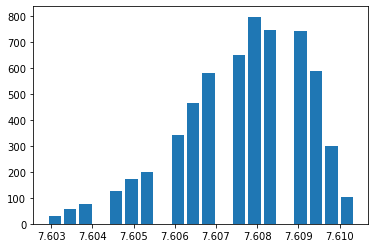

In [136]:
x = np.log(ndf1['Year'])
plt.hist(x, bins=20, rwidth=0.8)
plt.show()

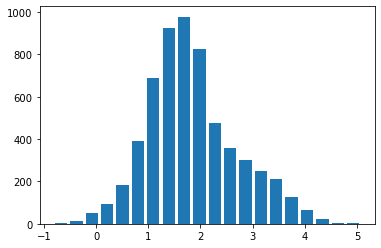

In [137]:
x = np.log(ndf1['Price'])
plt.hist(x, bins=20, rwidth=0.8)
plt.show()

In [163]:
#using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
numeric = scaler.fit_transform(ndf1)
ndf2 = pd.DataFrame(numeric, columns = ndf.columns)
ndf2

Unnamed: 0      Year  Kilometers_Driven  Seats     Price
0       0.000000  0.400000           0.011051    0.5  0.008210
1       0.000166  0.733333           0.006282    0.5  0.075583
2       0.000332  0.466667           0.007051    0.5  0.025445
3       0.000499  0.533333           0.013359    0.7  0.034846
4       0.000665  0.600000           0.006231    0.5  0.108423
...          ...       ...                ...    ...       ...
5964    0.999335  0.666667           0.004184    0.5  0.027012
5965    0.999501  0.733333           0.015359    0.5  0.022311
5966    0.999668  0.533333           0.008435    0.8  0.015417
5967    0.999834  0.600000           0.007051    0.5  0.013851
5968    1.000000  0.466667           0.007205    0.5  0.012911

[5969 rows x 5 columns]

In [143]:
cdf

Name    Location Fuel_Type Transmission  \
0               Maruti Wagon R LXI CNG      Mumbai       CNG       Manual   
1     Hyundai Creta 1.6 CRDi SX Option        Pune    Diesel       Manual   
2                         Honda Jazz V     Chennai    Petrol       Manual   
3                    Maruti Ertiga VDI     Chennai    Diesel       Manual   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore    Diesel    Automatic   
...                                ...         ...       ...          ...   
6014                  Maruti Swift VDI       Delhi    Diesel       Manual   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur    Diesel       Manual   
6016             Mahindra Xylo D4 BSIV      Jaipur    Diesel       Manual   
6017                Maruti Wagon R VXI     Kolkata    Petrol       Manual   
6018             Chevrolet Beat Diesel   Hyderabad    Diesel       Manual   

     Owner_Type     Mileage   Engine      Power  New_Price  
0         First  26.6 km/kg   998 CC  58.16 bhp  4.78 Lakh  
1         First  19.67 kmpl  1582 CC  126.2 bhp  4.78 Lakh  
2         First   18.2 kmpl  1199 CC   88.7 bhp  8.61 Lakh  
3         First  20.77 kmpl  1248 CC  88.76 bhp  4.78 Lakh  
4        Second   15.2 kmpl  1968 CC  140.8 bhp  4.78 Lakh  
...         ...         ...      ...        ...        ...  
6014      First   28.4 kmpl  1248 CC     74 bhp  7.88 Lakh  
6015      First   24.4 kmpl  1120 CC     71 bhp  4.78 Lakh  
6016     Second   14.0 kmpl  2498 CC    112 bhp  4.78 Lakh  
6017      First   18.9 kmpl   998 CC   67.1 bhp  4.78 Lakh  
6018      First  25.44 kmpl   936 CC   57.6 bhp  4.78 Lakh  

[6019 rows x 9 columns]

In [150]:
from sklearn.preprocessing import OneHotEncoder
#create object of onehotencoder class
ohe = OneHotEncoder()
#call function on object
nominal = ohe.fit_transform(cdf[['Name','Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']]).toarray()
ohe.get_feature_names()

cdf1 = pd.DataFrame(nominal, columns = ohe.get_feature_names_out())
cdf1

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Name_Ambassador Classic Nova Diesel  Name_Audi A3 35 TDI Attraction  \
0                                     0.0                             0.0   
1                                     0.0                             0.0   
2                                     0.0                             0.0   
3                                     0.0                             0.0   
4                                     0.0                             0.0   
...                                   ...                             ...   
6014                                  0.0                             0.0   
6015                                  0.0                             0.0   
6016                                  0.0                             0.0   
6017                                  0.0                             0.0   
6018                                  0.0                             0.0   

      Name_Audi A3 35 TDI Premium  Name_Audi A3 35 TDI Premium Plus  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
4                             0.0                               0.0   
...                           ...                               ...   
6014                          0.0                               0.0   
6015                          0.0                               0.0   
6016                          0.0                               0.0   
6017                          0.0                               0.0   
6018                          0.0                               0.0   

      Name_Audi A3 35 TDI Technology  Name_Audi A4 1.8 TFSI  \
0                                0.0                    0.0   
1                                0.0                    0.0   
2                                0.0                    0.0   
3                                0.0                    0.0   
4                                0.0                    0.0   
...                              ...                    ...   
6014                             0.0                    0.0   
6015                             0.0                    0.0   
6016                             0.0                    0.0   
6017                             0.0                    0.0   
6018                             0.0                    0.0   

      Name_Audi A4 1.8 TFSI Technology Edition  Name_Audi A4 2.0 TDI  \
0                                          0.0                   0.0   
1                                          0.0                   0.0   
2                                          0.0                   0.0   
3                                          0.0                   0.0   
4                                          0.0                   0.0   
...                                        ...                   ...   
6014                                       0.0                   0.0   
6015                                       0.0                   0.0   
6016                                       0.0                   0.0   
6017                                       0.0                   0.0   
6018                                       0.0                   0.0   

      Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
6014                                        0.0   
6015                                        0.0   
6016                                        0.0   
6017                                        0.0   
6018                                        0

In [169]:
new_df = pd.concat([ndf,cdf1], axis=1)
new_df.head()
new_df.isna().sum()

Unnamed: 0              0
Year                    0
Kilometers_Driven       0
Seats                   0
Price                   0
                       ..
New_Price_92.79 Lakh    0
New_Price_95.04 Lakh    0
New_Price_95.13 Lakh    0
New_Price_95.38 Lakh    0
New_Price_99.92 Lakh    0
Length: 3403, dtype: int64

# 5. Training Model

# 6. Prediction

# 7. Evaluating your Model